In [1]:
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.ticker import FormatStrFormatter
import matplotlib.font_manager as fm
import palettable

In [2]:
df = pd.read_csv('../output/convergent.csv')
df = pd.read_csv('../output_theta2/output_case3_analytical.csv')
#region = 3

In [53]:
df

,Unnamed: 0,tax_sce,regionbase,pe,tb,region,varphi,jxbar_prime,jmbar_prime,j0_prime,...,leakage2,leakage3,chg_extraction,chg_production,chg_consumption,chg_Qeworld,pai_g,subsidy_ratio,welfare,welfare_noexternality
0,0,Unilateral,US as Home,1.000000,0.000000,1,0.0,0.015921,0.793579,0.015921,...,0.000000,-1.287500,0.000000,0.000000,0.000001,8.000000e-07,0.000000,0.000000,-0.000003,-0.000003
1,7,Unilateral,US as Home,0.998753,0.034740,1,0.1,0.015925,0.793579,0.015602,...,-0.037656,0.111829,-0.017332,-0.006359,0.018885,-1.688705e-01,-0.094139,0.005190,0.021790,-0.021925
2,14,Unilateral,US as Home,0.997897,0.069416,1,0.2,0.015939,0.793579,0.015301,...,-0.062304,0.084225,-0.029245,-0.020999,0.028387,-3.370401e-01,-0.189194,0.010327,0.087318,-0.087179
3,21,Unilateral,US as Home,0.997417,0.104077,1,0.3,0.015961,0.793579,0.015014,...,-0.086713,0.056840,-0.035918,-0.043803,0.028713,-5.051476e-01,-0.285268,0.015411,0.196201,-0.196095
4,28,Unilateral,US as Home,0.997303,0.138760,1,0.4,0.015991,0.793579,0.014741,...,-0.110742,0.029776,-0.037512,-0.074634,0.020067,-6.739415e-01,-0.382428,0.020444,0.349017,-0.348824
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4136,4122,Unilateral,US and EU as Home,0.001638,344.791743,7,975.0,1.000000,0.792003,0.000022,...,-0.762831,-0.688019,-25.773033,-23.791831,-21.458513,-3.118886e+01,-1717.561319,0.999968,43907.030150,-2834.810669
4137,4129,Unilateral,US and EU as Home,0.001627,346.524106,7,980.0,1.000000,0.792003,0.000022,...,-0.762744,-0.688050,-25.776627,-23.791861,-21.461966,-3.119245e+01,-1726.215995,0.999969,44146.745650,-2840.211224
4138,4136,Unilateral,US and EU as Home,0.001617,348.256275,7,985.0,1.000000,0.792003,0.000022,...,-0.762658,-0.688081,-25.780192,-23.791890,-21.465390,-3.119602e+01,-1734.869706,0.999969,44386.488850,-2845.594060
4139,4143,Unilateral,US and EU as Home,0.001606,349.988425,7,990.0,1.000000,0.792003,0.000022,...,-0.762572,-0.688112,-25.783726,-23.791918,-21.468786,-3.119955e+01,-1743.523320,0.999969,44626.259090,-2850.959333


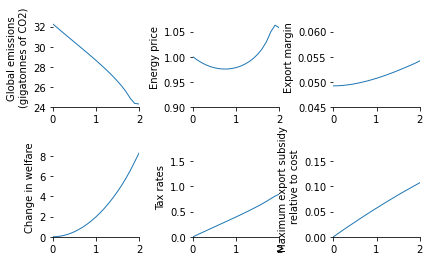

In [54]:
fig, ((ax1, ax2, ax3), (ax4, ax5, ax6)) = plt.subplots(2, 3)
ax1.set_position([.1, .6, .2, .35])
ax2.set_position([.425, .6, .2, .35])
ax3.set_position([.75, .6, .2, .35])
ax4.set_position([.1, .15, .2, .35])
ax5.set_position([.425, .15, .2, .35])
ax6.set_position([.75, .15, .2, .35])


for ax in fig.get_axes():
    ax.set_xlim(0,2)
    ax.spines["top"].set_visible(False)   
    ax.spines["bottom"].set_visible(True)    
    ax.spines["right"].set_visible(False)    
    ax.spines["left"].set_visible(False)
    
ax1.set_ylabel('Global emissions \n(gigatonnes of CO2)')
ax2.set_ylabel('Energy price')
ax3.set_ylabel('Export margin')
ax4.set_ylabel('Change in welfare')
ax5.set_ylabel('Tax rates')
ax6.set_ylabel('Maximum export subsidy \nrelative to cost')

df1=df[(df['tax_sce']=='Unilateral') & (df['region']==region)]
l1,=ax1.plot(df1['varphi'],df1['Qeworld_prime'], color='C0',linewidth=1)
ax2.plot(df1['varphi'],df1['pe'], color='C0',linewidth=1)
ax3.plot(df1['varphi'],df1['jxbar_prime'], color='C0',linewidth=1)
ax4.plot(df1['varphi'],df1['welfare'], color='C0',linewidth=1)
ax5.plot(df1['varphi'],df1['tb'], color='C0',linewidth=1)
ax6.plot(df1['varphi'],df1['subsidy_ratio'], color='C0',linewidth=1)

ax1.set_ylim(24, 34)
ax2.set_ylim(0.9, 1.1)
ax3.set_ylim(0.045, 0.065)
ax4.set_ylim(0, 10)
ax5.set_ylim(0, 2)
ax6.set_ylim(0, 0.2)

ax1.set_yticks([24,26,28,30,32])
ax2.set_yticks([0.9,0.95,1.0,1.05])
ax3.set_yticks([0.045, 0.050, 0.055, 0.060])
ax4.set_yticks([0,2,4,6,8])
ax5.set_yticks([0,0.5,1,1.5])
ax6.set_yticks([0,0.05,0.1,0.15])

#plt.savefig('../plots/fig1_new.pdf', format='PDF')

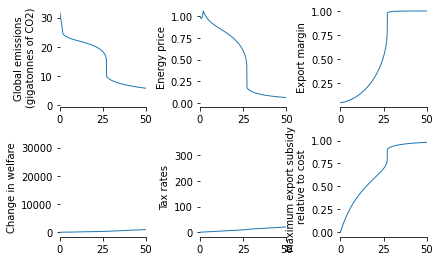

In [63]:
fig, ((ax1, ax2, ax3), (ax4, ax5, ax6)) = plt.subplots(2, 3)
ax1.set_position([.1, .6, .2, .35])
ax2.set_position([.425, .6, .2, .35])
ax3.set_position([.75, .6, .2, .35])
ax4.set_position([.1, .15, .2, .35])
ax5.set_position([.425, .15, .2, .35])
ax6.set_position([.75, .15, .2, .35])


for ax in fig.get_axes():
    ax.set_xlim(0,50)
    ax.spines["top"].set_visible(False)   
    ax.spines["bottom"].set_visible(True)    
    ax.spines["right"].set_visible(False)    
    ax.spines["left"].set_visible(False)
    
ax1.set_ylabel('Global emissions \n(gigatonnes of CO2)')
ax2.set_ylabel('Energy price')
ax3.set_ylabel('Export margin')
ax4.set_ylabel('Change in welfare')
ax5.set_ylabel('Tax rates')
ax6.set_ylabel('Maximum export subsidy \nrelative to cost')

df1=df[(df['tax_sce']=='Unilateral') & (df['region']==region)]
l1,=ax1.plot(df1['varphi'],df1['Qeworld_prime'], color='C0',linewidth=1)
ax2.plot(df1['varphi'],df1['pe'], color='C0',linewidth=1)
ax3.plot(df1['varphi'],df1['jxbar_prime'], color='C0',linewidth=1)
ax4.plot(df1['varphi'],df1['welfare'], color='C0',linewidth=1)
ax5.plot(df1['varphi'],df1['tb'], color='C0',linewidth=1)
ax6.plot(df1['varphi'],df1['subsidy_ratio'], color='C0',linewidth=1)


#plt.savefig('../plots/fig1_big.pdf', format='PDF')

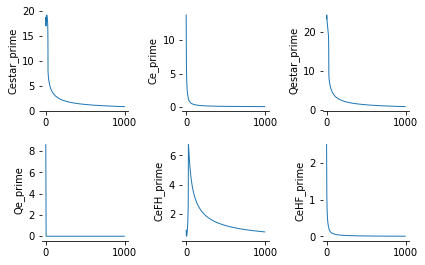

In [56]:
fig, ((ax1, ax2, ax3), (ax4, ax5, ax6)) = plt.subplots(2, 3)
ax1.set_position([.1, .6, .2, .35])
ax2.set_position([.425, .6, .2, .35])
ax3.set_position([.75, .6, .2, .35])
ax4.set_position([.1, .15, .2, .35])
ax5.set_position([.425, .15, .2, .35])
ax6.set_position([.75, .15, .2, .35])


for ax in fig.get_axes():
    #ax.set_xlim(0,10)
    ax.spines["top"].set_visible(False)   
    ax.spines["bottom"].set_visible(True)    
    ax.spines["right"].set_visible(False)    
    ax.spines["left"].set_visible(False)
    
ax1.set_ylabel('Cestar_prime')
ax2.set_ylabel('Ce_prime')
ax3.set_ylabel('Qestar_prime')
ax4.set_ylabel('Qe_prime')
ax5.set_ylabel('CeFH_prime')
ax6.set_ylabel('CeHF_prime')

df1=df[(df['tax_sce']=='Unilateral') & (df['region']==region)]
l1,=ax1.plot(df1['varphi'],df1['Cestar_prime'], color='C0',linewidth=1)
ax2.plot(df1['varphi'],df1['Ce_prime'], color='C0',linewidth=1)
ax3.plot(df1['varphi'],df1['Qestar_prime'], color='C0',linewidth=1)
ax4.plot(df1['varphi'],df1['Qe_prime'], color='C0',linewidth=1)
#ax5.plot(df1['varphi'],df1['CeHH_prime'], color='C0',linewidth=1)
ax5.plot(df1['varphi'],df1['CeFH_prime'], color='C0',linewidth=1)
ax6.plot(df1['varphi'],df1['CeHF_prime'], color='C0',linewidth=1)


#plt.savefig('../plots/fig1_othervar.pdf', format='PDF')

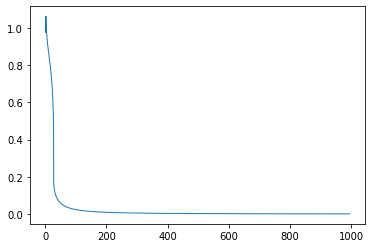

In [57]:
plt.plot(df1['varphi'],df1['pe'], color='C0',linewidth=1)

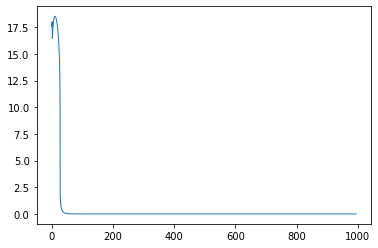

In [58]:
plt.plot(df1['varphi'],df1['CeHH_prime'], color='C0',linewidth=1)

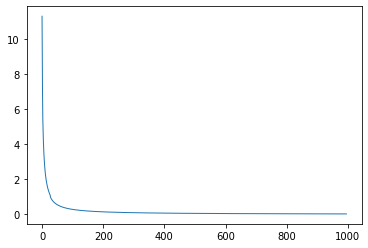

In [59]:
plt.plot(df1['varphi'],df1['CeHH_prime'], color='C0',linewidth=1)

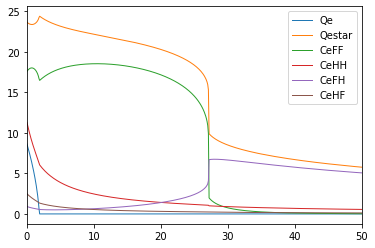

In [84]:
#plt.plot(df1['varphi'],df1['Qeworld_prime'],linewidth=1, label = 'Qeworld')
plt.xlim(0,50)
plt.plot(df1['varphi'],df1['Qe_prime'],linewidth=1, label = 'Qe')
plt.plot(df1['varphi'],df1['Qestar_prime'],linewidth=1, label = 'Qestar')
plt.plot(df1['varphi'],df1['CeFF_prime'],linewidth=1, label = 'CeFF')
plt.plot(df1['varphi'],df1['CeHH_prime'],linewidth=1, label = 'CeHH')
plt.plot(df1['varphi'],df1['CeFH_prime'],linewidth=1, label = 'CeFH')
plt.plot(df1['varphi'],df1['CeHF_prime'],linewidth=1, label = 'CeHF')
plt.legend()

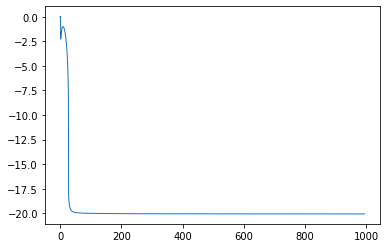

In [68]:
plt.plot(df1['varphi'],df1['chg_production'], color='C0',linewidth=1)

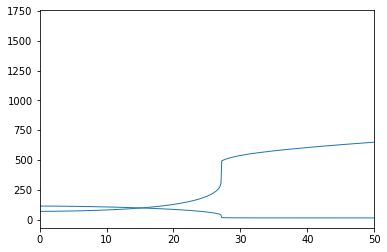

In [88]:
plt.xlim(0,50)
plt.plot(df1['varphi'],df1['Lg_prime'], color='C0',linewidth=1)
plt.plot(df1['varphi'],df1['Lgstar_prime'], color='C0',linewidth=1)

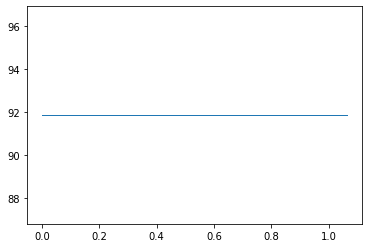

In [92]:
#plt.xlim(0,50)
plt.plot(df1['pe'],df1['Vg_prime'], color='C0',linewidth=1)
#plt.plot(df1['varphi'],df1['Vgstar_prime'], color='C0',linewidth=1)